<p><b><u>Introduction</b></u>
<p>In my research about computer vision and its constant effort to improve and cope with the billions of available/processing images daily, I feel that this is going to be a continuous learning process until it reaches perfection in whatever field and purpose it is required for. Image classification covers a vast variety of  different areas and it can be almost used across all domain to improve its business especially through identifying certain major findings/defects, suggesting, detecting etc., Though it is hard for computers to recognize due to high dimension/quality of images, and huge available variety of image classification available,  this is one of a fascinating classification to learn using Machine/deep learning which really will benefit any business/domain.</p>

In [1]:
#Tensorflow installation done
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

<p><b><u>Overview about Dataset</b></u>
<p>Fashion MNIST is a popular dataset available on Kaggle which contains a total of 70,000 grayscale resized images to 28*28 pixel, that can be categorized into 10 different types of fashion items. This data is divided into 60,000 which can be used as training dataset and 10,000 as testing dataset.</p> 

<p>As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the size of each train and test dataset</p>

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

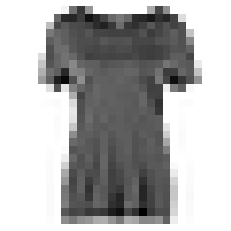

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


In [10]:
#Reshaping the dataset
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

<p><b><u>Project Objective</b></u>
<p>The main objective of this project is to attain maximum accuracy in classification using different methods of models in the dataset to achieve its best performance. The models which I used are Logistic Regression, Naive Bayes, Decision Tree Classifier, Random Forest, Neural Network, K-Nearest Neighbors & SVM.</p>

<p><b><u>Model Comparisons and Results:</b></u>
<p><b>Model Name: Logistic Regression</b>
The first model i used is Logistic FRegression. There was not much of challenges I faced when I implemented this model but the accuracy score of in sample dataset for this model is around 87% which outweighs the percentage of out-of sample data which is 84%. Beside the fact that train data outperforms the test data, I suggest this model can be used to achieve some level of accuracy for our dataset.

In [23]:
#Importing all necessary packages and model modules required 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from PIL import Image

In [11]:
#implementing Logistic Regression Model
log_model = LogisticRegression(max_iter= 200)

#Fitting the train dataset
log_model.fit(X_train, y_train)

#Predicting the test dataset
yTestHat_log = log_model.predict(X_test)
yTrainHat_log = log_model.predict(X_train)

C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#Checking accuracy for In-sample data
inSample_log = accuracy_score(y_train,yTrainHat_log, normalize = True) * 100
print("In-sample Accuracy: ", inSample_log)

#Checking out sample accuracy
outOfSample_log = accuracy_score(y_test,yTestHat_log, normalize = True) * 100
print("Out-of-sample Accuracy: ", outOfSample_log)

#Deriving report 
cr_log = classification_report(y_test,yTestHat_log)
print("Classification Report:", cr_log)

#caluclating the confusion matrix
print("Confusion Matrix:", confusion_matrix(y_test,yTestHat_log))

In-sample Accuracy:  87.03
Out-of-sample Accuracy:  84.0
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.73      0.73      1000
           3       0.83      0.85      0.84      1000
           4       0.72      0.77      0.74      1000
           5       0.95      0.90      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix: [[795  11  12  48   8   0 114   0  12   0]
 [  3 961   3  25   3   0   3   0   2   0]
 [ 23   6 729  12 139   1  76   0  14   0]
 [ 26  23  19 

<p><b> Model Name: Decision Tree classifier</b>
<p>The second model used is "Decision Tree classifier". Though this model does not require much of scaling, I used Grid Search Cross Validation to select maximum depth to get maximum accuracy. The best which got selected is the number 8, but the accuracy achieved using this model is 78% which is less than that of Logistic regression.</p>

In [13]:
#Implementing Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()

#Selection using hyperparameter concept
param_grid_dt = {'max_depth': [5,6,7,8]}

#Using StratifiedKFold with n_splits 5
cv_dt = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

#Declaring needed variables to implement the model
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv = cv_dt, 
                    return_train_score=True, scoring='accuracy')

#Fitting the model
grid_dt.fit(X_train, y_train)
print("Best Parameter selected: {}".format(grid_dt.best_params_))
print("Best Cross Validation Score: {}".format(grid_dt.best_score_))

#Step selecting the best model for Decison Tree
model_bestDT = grid_dt.best_estimator_

#Predicting train dataset
yTrainHat_dt  = model_bestDT.predict(X_train)

#Predicting Test Dataset
yTestHat_dt  = model_bestDT.predict(X_test)

Best Parameter selected: {'max_depth': 8}
Best Cross Validation Score: 0.78865


In [14]:
#Checking accuracy for In-sample data
inSample_dt = accuracy_score(y_train,yTrainHat_dt, normalize = True) * 100

#Checking out sample accuracy 
outOfSample_dt = accuracy_score(y_test,yTestHat_dt, normalize = True) * 100
print("In-sample Accuracy: ", inSample_dt)
print("Out-of-sample Accuracy: ", outOfSample_dt)

#Deriving Report
cr_dt = classification_report(y_test,yTestHat_dt)
print(cr_dt)
print("Confusion Matrix:", confusion_matrix(y_test,yTestHat_dt))

In-sample Accuracy:  80.55666666666667
Out-of-sample Accuracy:  78.18
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.97      0.92      0.95      1000
           2       0.63      0.67      0.65      1000
           3       0.78      0.82      0.80      1000
           4       0.57      0.68      0.62      1000
           5       0.93      0.84      0.88      1000
           6       0.58      0.39      0.47      1000
           7       0.87      0.89      0.88      1000
           8       0.89      0.89      0.89      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Confusion Matrix: [[797   2  25  48  26   1  83   0  15   3]
 [ 14 922   3  43  11   1   2   0   3   1]
 [ 11   0 671  16 224   0  65   0  13   0]
 [ 44  13  26 822  56   

<p><b> Model Name: Naive Bayes</b>
<p>Though Naive Bayes predicted fast compared with other complex models but the accuracy score seems to be worst for the dataset selected which is around 59%. So this model is not a good suit for this dataset</p>

In [15]:
#Model Implementation
nb_model = GaussianNB()

#Fitting the Model
nb_model.fit(X_train, y_train)

#Predicting Test data
yTestHat_nb = nb_model.predict(X_test)

#Predicting Train Data
yTrainHat_nb = nb_model.predict(X_train)

In [17]:
#Deriving Accuracy score for test data
nb_test = accuracy_score(y_test,yTestHat_nb, normalize = True) * 100

#Deriving Accuract score for train data
nb_train = accuracy_score(y_train,yTrainHat_nb, normalize = True) * 100 

print("The accuracy score of test data by Naive Bayes is = " + str(nb_test))
print("The accuracy score of train data by Naive Bayes is = " + str(nb_train))
cr_nb = classification_report(y_test,yTestHat_nb)
print(cr_nb)
print("Confusion Matrix:", confusion_matrix(y_test,yTestHat_nb))

The accuracy score of test data by Naive Bayes is = 58.56
The accuracy score of train data by Naive Bayes is = 58.778333333333336
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000

Confusion Matrix: [[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  

<p><b> Model Name: K-Nearesr Neighbors</b>
<p> KNN which can be used for both classification as well as regression seem to work well for our dataset. To find the best n_neighbors for KNN, I used Grid Selection Cross validation with 5 fold. But the accuracy scores were almost similar when I chose 5, 6 and same when I select 4,5. Finally I decided to go with n_neighbors as 5. The accuracy score is 86% which is pretty good comapred to the other models used so far. Amoung the model used so far in my analysis, this model seems to give me the highest accuracy score. Though it took time to run the model, the result seem to be pretty good in classifying the dataset.

In [18]:
#Implementing the Model
KNN_model = KNeighborsClassifier()

#Selecting the best n_neighbors using GridSelectionCV for train dataset
param_grid = {'n_neighbors': [1,2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Validation Score: 0.8570166666666665


In [19]:
#Implementing the Model
from sklearn.model_selection import GridSearchCV

KNN_model = KNeighborsClassifier()

#Selecting the best n_neighbors using GridSelectionCV for test dataset
param_grid = {'n_neighbors': [1,2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_test, y_test)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 6}
Best Cross Validation Score: 0.8139999999999998


In [20]:
#Finally selecting n_neighbors as 5 and fitting the train and test data
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#Predicting test dataset
yTestHatKNN5 = KNN_model.predict(X_test)

#Predicting train dataset
yTrainHatKNN5 = KNN_model.predict(X_train)

#Deriving Accuracy score go==for test dataset
KNN_test = accuracy_score(y_test,yTestHatKNN5, normalize = True) * 100 

#Deriving Accuracy score go==for train dataset
KNN_train = accuracy_score(y_train,yTrainHatKNN5, normalize = True) * 100

#Classification report for the model KNN
cr_KNN = classification_report(y_test,yTestHatKNN5)
print(cr_KNN)
print("Confusion Matrix:", confusion_matrix(y_test,yTestHatKNN5))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

Confusion Matrix: [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   

In [25]:
KNN_model = KNeighborsClassifier(n_neighbors=6)

KNN_model.fit(X_train, y_train)

yTestHatKNN6 = KNN_model.predict(X_test)

KNN_test = accuracy_score(y_test,yTestHatKNN6, normalize = True) * 100

cr_KNN = classification_report(y_test,yTestHatKNN6)
print(cr_KNN)


              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.71      0.83      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.80      0.75      0.77      1000
           5       0.99      0.83      0.91      1000
           6       0.67      0.56      0.61      1000
           7       0.88      0.97      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



<p><b> Model Name: Random Forest Classifier</b>
<p> SO far from all hte model used for our dataset, Random Forest Classifier perfroms the best. The only draw back is that it took more time than expected. The accuracy score was about 88% which is great and the in sample accuracy is 100%. When trying Gris SearchCV for selecting best hyperparameter, the value which got selected among 100,140,150 is 140. 

In [42]:
#Implementing Random Forest Classifier model 
rf_model = RandomForestClassifier(random_state=0)

#Estimating best hyperprameter using Grid searchCV
rf_hpGrid = {'n_estimators': [100,140,150]}

rf_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
rf_grid = GridSearchCV(rf_model, rf_hpGrid, cv = rf_cv, 
                    return_train_score=True, scoring='accuracy')

#Fitting the train and test data
rf_grid.fit(X_train, y_train)

print("Best Parameter: {}".format(rf_grid.best_params_))

# let's check in-sample and out-of-sample accuracy
modelBest = rf_grid.best_estimator_
print("Best Model: {}".format(modelBest))

#calculating the y_hat values for in and out sample data
yTrainHat_rf  = modelBest.predict(X_train)
yTestHat_rf  = modelBest.predict(X_test)

Best Parameter: {'n_estimators': 140}
Best Model: RandomForestClassifier(n_estimators=140, random_state=0)


In [44]:
#in smaple and out of sample score
inSample_rf = accuracy_score(y_train,yTrainHat_rf, normalize = True) * 100
outOfSample_rf = accuracy_score(y_test,yTestHat_rf, normalize = True) * 100

print("In-sample Accuracy: ", inSample_rf)
print("Out-of-sample Accuracy: ", outOfSample_rf)

#classification and confusion matrix
cr_rf = classification_report(y_test,yTestHat_rf)
print(cr_rf)

print("Confusion Matrix:", confusion_matrix(y_test,yTestHat_rf))

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  87.83999999999999
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.78      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix: [[863   0  12  33   5   1  76   0  10   0]
 [  2 959   4  24   4   0   5   0   2   0]
 [ 13   0 814  10 107   0  54   0   2   0]
 [ 19   2   7 905  28   

<p><b> Model Name: Neural Network</b>
<p>The accuracy score is not more than Random forest classifier for this dataset when running Neural networks using 'lbfgs' as the solver. The 'hidden_layer_sizes' which got selected among [120,105],[100,90],[130,110] is [130,110], with in sample accuracy score of around 84% and out of sample accuracy score of around 83%. The overall accuracy for this model is 82% which is less than logistic Regression but greater than Decision Tree classifier and KNN models.

In [54]:
#Implementing the model 
nn_model = MLPClassifier(solver='lbfgs',random_state=0)

#finding best hyperparameter values
param_grid_nn = {'hidden_layer_sizes': [[120,105],[100,90],[130,110]]}


nn_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

#defining the training model
nn_grid = GridSearchCV(nn_model, param_grid_nn, cv = nn_cv, 
                    return_train_score=True, scoring='accuracy')
#Fitting the model 
nn_grid.fit(X_train, y_train)

#Printing the results
print("Best Parameter: {}".format(nn_grid.best_params_))
print("Best Cross Validation Score: {}".format(nn_grid.best_score_))

#Preidting train and test dataset
yTrainHat_nn = nn_grid.predict(X_train)
yTestHat_nn = nn_grid.predict(X_test)

#calculating accuracy score for in and out sample data
inSample_nn = accuracy_score(y_train,yTrainHat_nn, normalize = True) * 100
outOfSample_nn = accuracy_score(y_test,yTestHat_nn, normalize = True) * 100

print("In-sample Accuracy: ", inSample_nn)
print("Out-of-sample Accuracy: ", outOfSample_nn)

#The in-sample and out-of-accuracy score which I got earlier for this particular model was,
#In-sample Accuracy:  83.67666666666666
#Out-of-sample Accuracy:  82.3


C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

Best Parameter: {'hidden_layer_sizes': [130, 110]}
Best Cross Validation Score: 0.8343333333333334


TypeError: 'numpy.float64' object is not callable

In [58]:
#classification report 
cr_nn = classification_report(y_test,yTestHat_nn)
print(cr_nn)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.97      0.95      0.96      1000
           2       0.70      0.73      0.71      1000
           3       0.82      0.82      0.82      1000
           4       0.69      0.76      0.72      1000
           5       0.94      0.91      0.92      1000
           6       0.59      0.53      0.56      1000
           7       0.90      0.92      0.91      1000
           8       0.91      0.94      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



<p><b>Classification using own Fashion Pieces</b>
<p> The second part of this project involves, using own images classifying each of the five images using the best prediction model which gives us the best result for the Fashion MNIST dataset. The best model I choose for the below task is "Random Forest Classifier". 

In [36]:
import numpy as np 
import pandas as pd
import os
import os. path

df = pd.DataFrame()
path = "D:\DS_pics"

for pic in os.listdir(path):
    pathDes = path+"/"+pic
    pic = Image.open(pathDes).convert('L').resize((28,28))
    pics = np.reshape(pic,[1,784])
    pic = pd.DataFrame(pics)
    df = df.append(pic, ignore_index = True)
    pic.to_pickle(pathDes)
print(df)


   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0  180  180  181  182  182  183  183  184  184  185  ...   47   45   43   41   
1   34   37   38   43   41   44   47   48   48   44  ...  168  155  144  138   
2  166  206  207  208  210  213  196  129  173  201  ...  230  227  217  210   
3   80   84   92   96  110  202  215  221  217  207  ...  127  141  145  143   
4   70   74   78   76   77   81   78   81   86   91  ...   98  101  106  130   

   778  779  780  781  782  783  
0   39   39   40   42   43   44  
1  132  120  117  120  114  110  
2  211  224  233  236  234  232  
3  134  133  128  115  109  107  
4  160  173  170  163  157  146  

[5 rows x 784 columns]


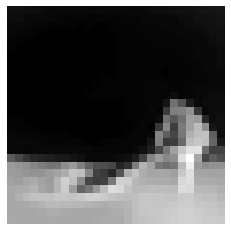

In [48]:
from numpy import asarray
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pic_array = asarray(df)
testImage = pic_array[0]
plt.imshow(testImage.reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

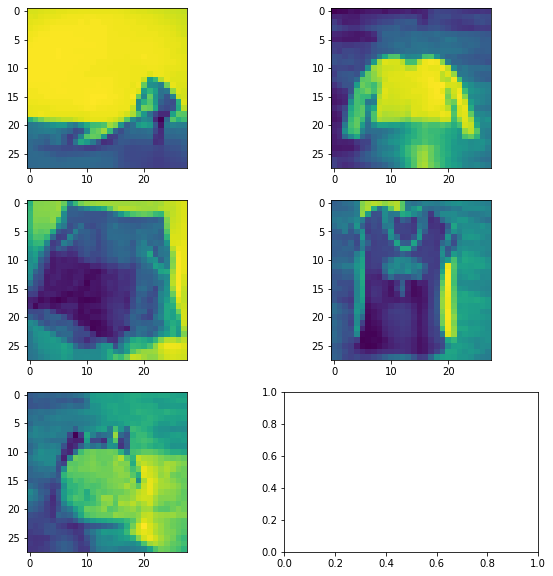

In [49]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0,0].imshow(pic_array[0].reshape(28,28))
ax[0,1].imshow(pic_array[1].reshape(28,28))
ax[1,0].imshow(pic_array[2].reshape(28,28))
ax[1,1].imshow(pic_array[3].reshape(28,28))
ax[2,0].imshow(pic_array[4].reshape(28,28))

In [50]:
#Using Random Forest Classifier on own fashion pieces to find out Accuracy
rf_model = RandomForestClassifier(n_estimators=140,random_state=0)
rf_model.fit(X_train, y_train)

#Image Prediction
yTestHat_imgPre = rf_model.predict(df)
print(yTestHat_imgPre)

[8 8 6 6 8]


In [52]:
#Assigning class names to own fashion images
df = df.assign(images=['Sandal','T-shirt/top','Trouser','T-shirt/top','Bag'])
df.set_index('images', inplace = True)

#Fetching class names comparing original dataset's class and own images assigned class
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[yTestHat_imgPre[3]])


Shirt


In [53]:
#Predicting accuracy
yTestPre = [6,1,2,1,9]
accuracy_score = accuracy_score(yTestPre,yTestHat_imgPre, normalize = True) * 100
print("accuracy score of predicted model:",accuracy_score )

accuracy score of predicted model: 0.0
